## Explainable AI

####  GROUP MEMEBRS (DIA1)  : GEETHU SAMEELA  

###### Question 2.
We conducted a comprehensive analysis of the Diabetes Dataset from Kaggle, focusing on identifying significant predictors of diabetes and developing a predictive model. Our analysis revealed that key variables such as Glucose, BMI, Age, Insulin, and Diabetes Pedigree Function are critical in predicting diabetes outcomes.

###### 

We chosen the Diabetes Dataset from Kaggle.

Target Variable: Outcome (0 = No Diabetes, 1 = Diabetes)

Explanatory Variables:

Pregnancies: Number of pregnancies.

Glucose: Plasma glucose concentration.

BloodPressure: Diastolic blood pressure (mm Hg).

SkinThickness: Triceps skinfold thickness (mm).

Insulin: 2-hour serum insulin (mu U/ml).

BMI: Body mass index.

DiabetesPedigreeFunction: Genetic predisposition.

Age: Age in years.

This dataset provides a mix of numerical and categorical features that are easy to interpret and analyze.

#####  Question 3.

 Let’s begin with some visualizations.
 
 • Based on your intuition, what are the most important variables for predicting your target variable?
 
 • Create visualizations that take into account the type of variable (categorical, numerical) that shows the correlation of the features you selected.
 
 • Don’t forget to clean your dataset as needed in order to deal with missing values and outliers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score, roc_curve
import shap


In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    df[col] = df[col].replace(0, np.nan)

# Fill missing values 
for col in columns_with_zeros:
    df[col].fillna(df[col].median(), inplace=True)

# Confirm cleaning
print(df.isnull().sum())  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


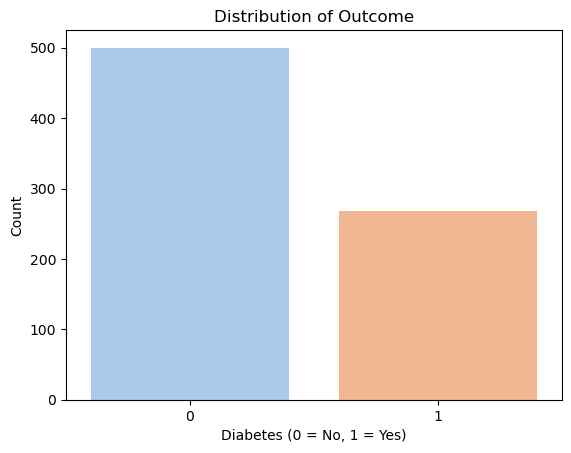

In [6]:
sns.countplot(data=df, x='Outcome', palette='pastel', hue='Outcome', dodge=False, legend=False)
plt.title("Distribution of Outcome")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



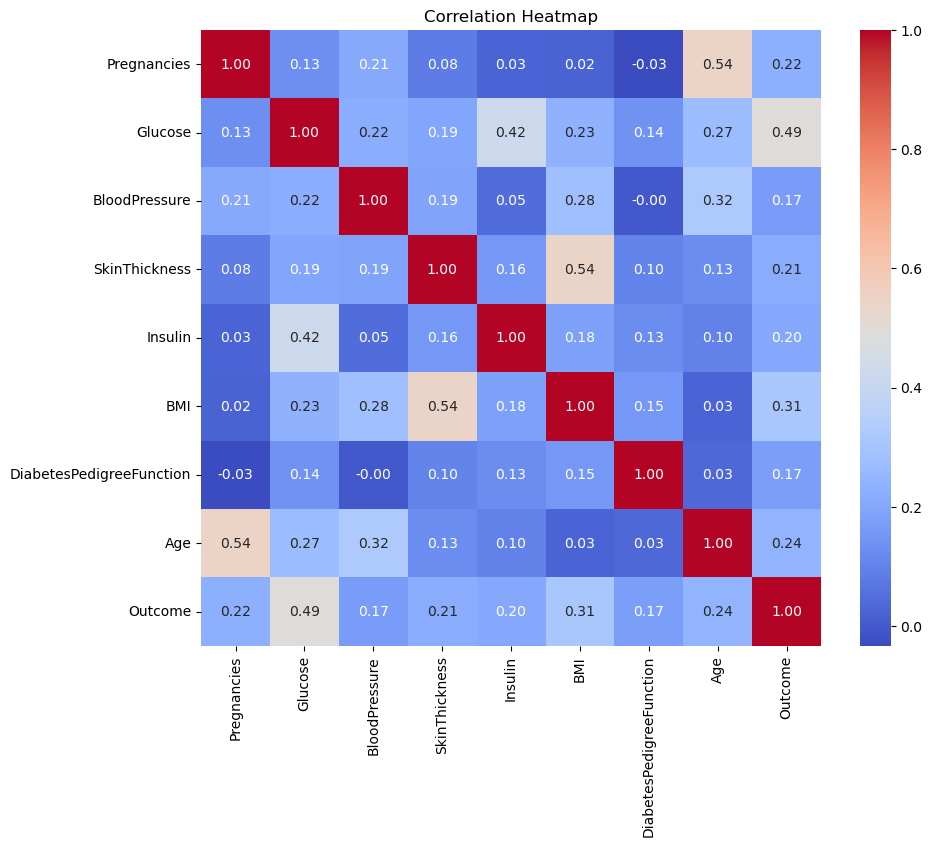

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


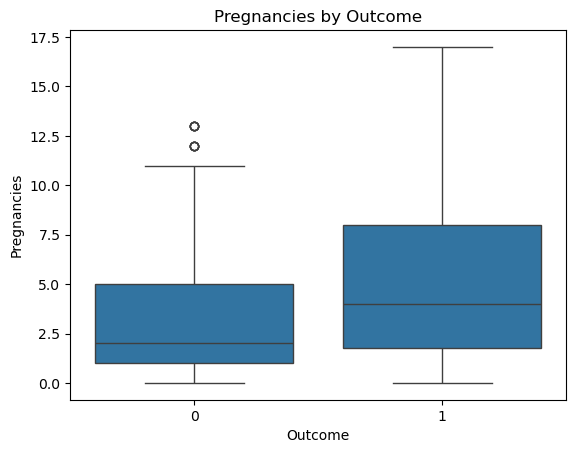

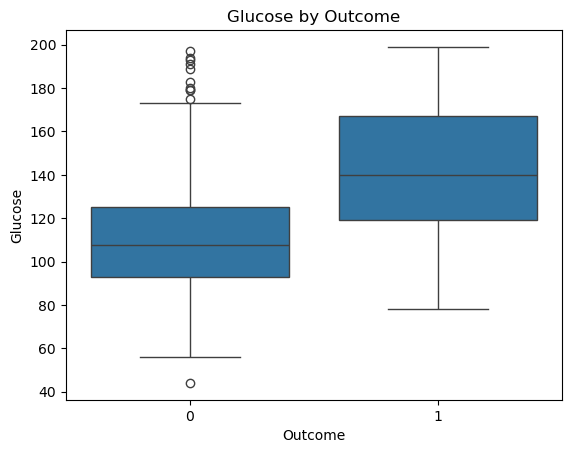

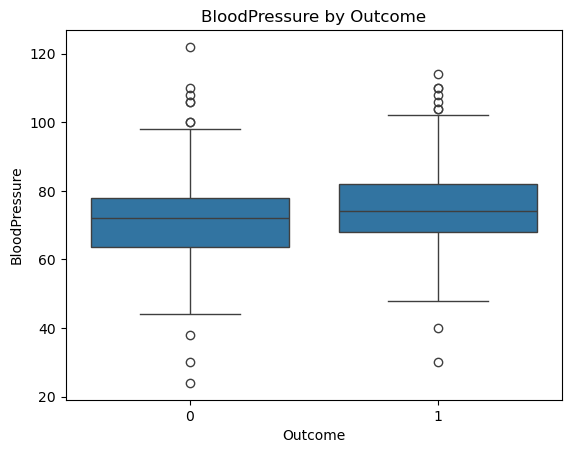

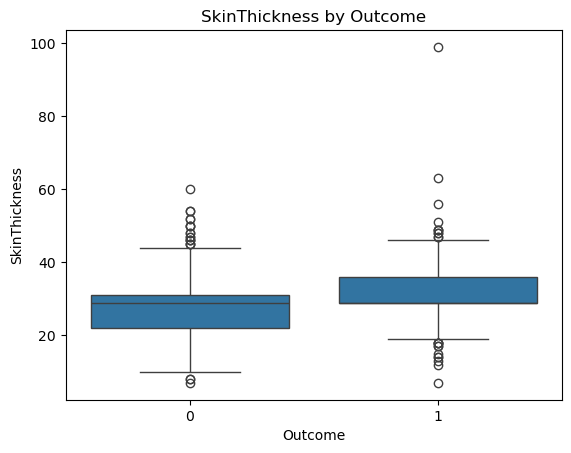

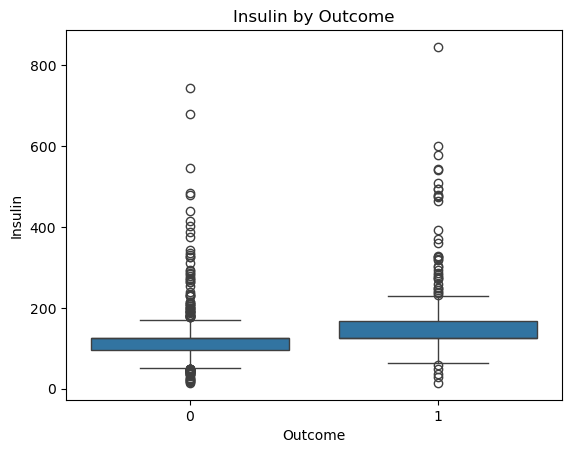

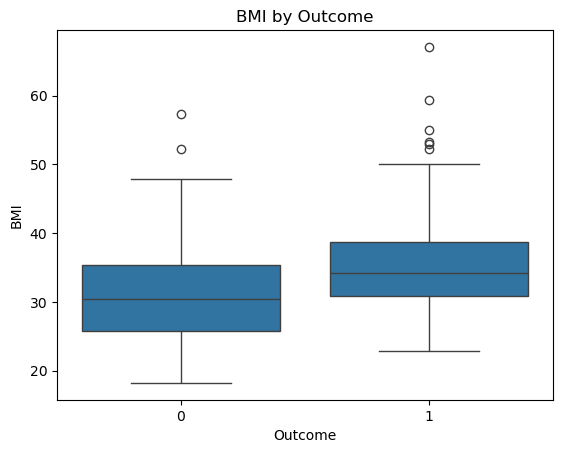

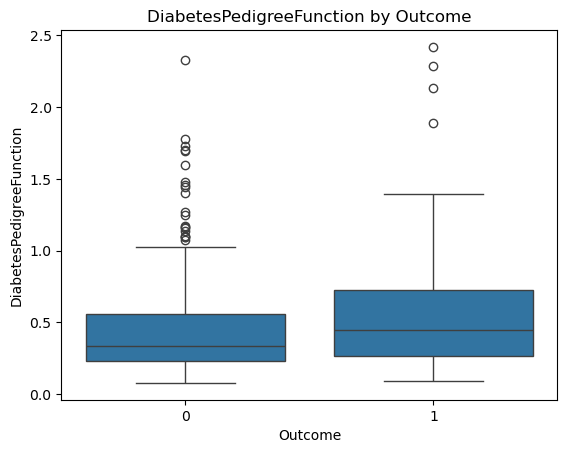

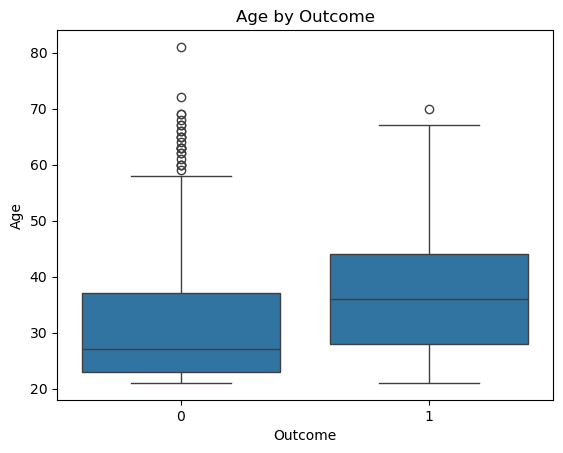

In [8]:
# Boxplot for categorical/numerical relationships
for column in df.columns[:-1]: 
    sns.boxplot(data=df, x='Outcome', y=column)
    plt.title(f'{column} by Outcome')
    plt.show()

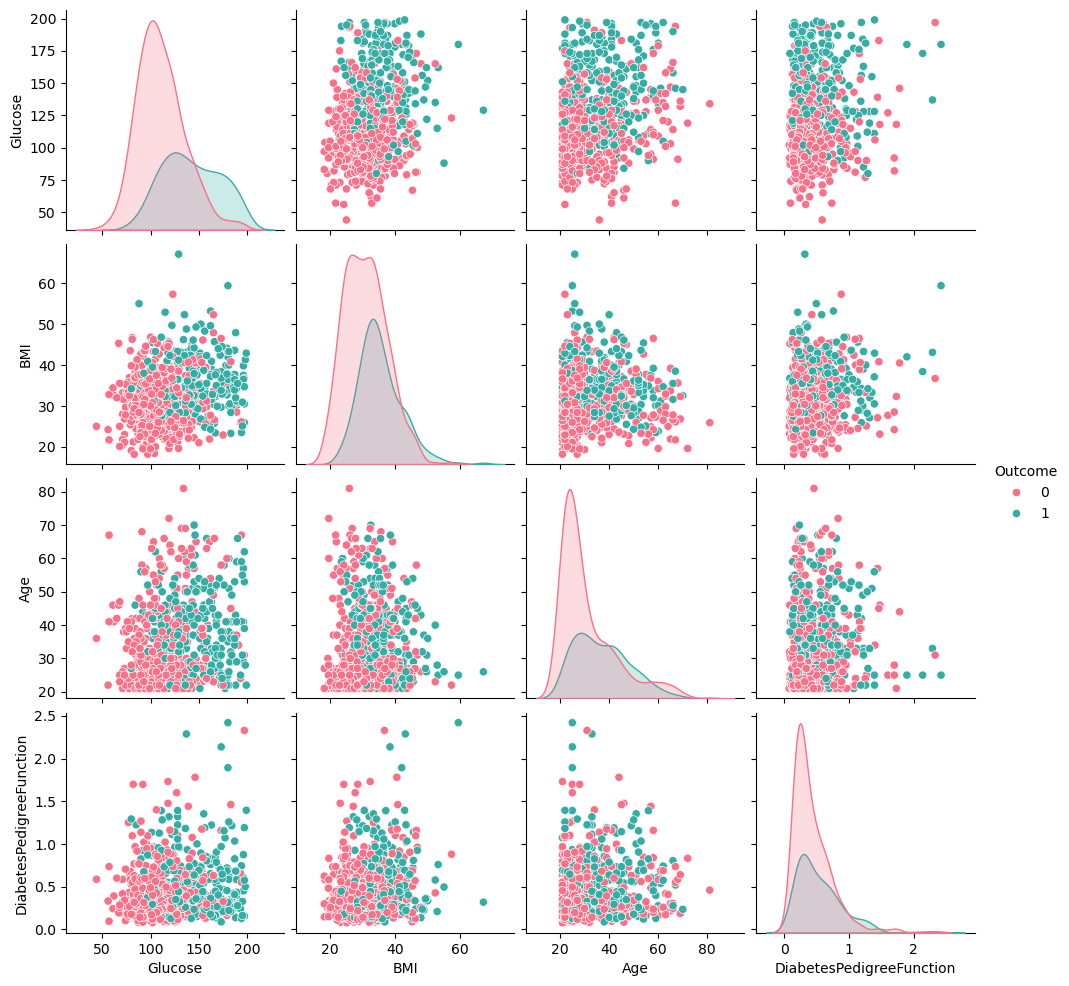

In [9]:
# Pairplot
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction'], palette='husl')
plt.show()


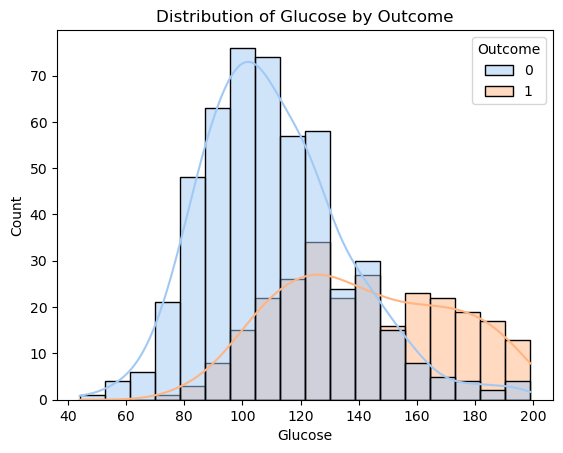

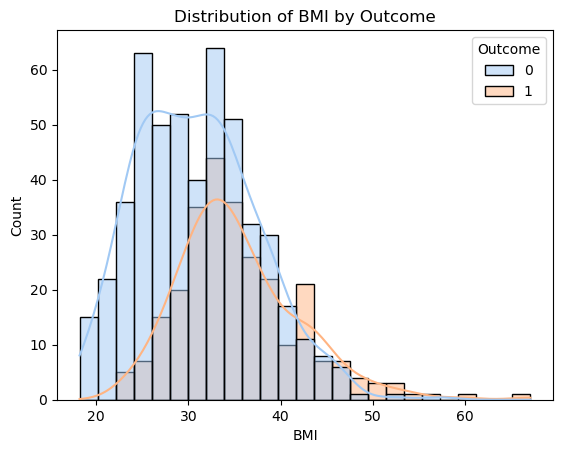

In [10]:
# Histogram for Glucose
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True, palette='pastel')
plt.title("Distribution of Glucose by Outcome")
plt.show()

# Histogram for BMI
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True, palette='pastel')
plt.title("Distribution of BMI by Outcome")
plt.show()


###### Based on intuition, glucose, BMI, age, insulin, and diabetes pedigree function are the most likely significant predictors since they are closely linked to essential risk factors for diabetes (such insulin resistance, obesity, and family history). Pregnancies and blood pressure are also important, though maybe not as much as the others in this instance.

#### Question 4.
 Let us do a linear regression.
 
 • Do the variable transformations that are needed (on hot encoding, log etc...)
 
 • Fit the linear regression
 
 • Interpret the coefficients of your regression
 
 • Does any coefficient contradict your intuition?

In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
# Splitting the dataset
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [15]:
# Coefficients and Performance Metrics
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Coefficients: [ 0.03692074  0.1923168  -0.02223294  0.00669354 -0.02050578  0.10791476
  0.03022164  0.06686652]
Intercept: 0.3469055374592834
Mean Squared Error: 0.16474010008034362
R2 Score: 0.2824653418722809


###### Yes  ,there are some coefficients that defy common sense. For example, since higher levels of SkinThickness and Insulin are often linked to a higher risk of diabetes, the negative coefficients for these measurements do not match medical understanding. The linear model's incapacity to capture nonlinear interactions or multicollinearity among predictors could be the cause of this disparity. 

##### question 5

Let’s build a more complex model

 • Build the ”best” model you can using traditional data science (no deep learning)
 
 • Don’t hesitate to fine tune it, try different combination of variables etc
 
 • What is the best metric you can reach? Can you consider it ”good”
 
 • Given your results what use case can be done with this model?

In [16]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Grid Search for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [17]:

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performance Metrics
print("Best Parameters:", grid_search.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy Score: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



###### The accuracy score of 0.7597, the best metric obtained with this model, shows that the model accurately predicted the outcome in almost 76% of the cases. Although accuracy is a useful indicator, it does not take class imbalances into consideration; instead, other metrics such as precision, recall, and F1-score are crucial. Additional information about the model's performance is provided by the classification report, which indicates that there may be an imbalance in the dataset because the precision and recall for class 0 (non-diabetic) are greater than for class 1 (diabetic). 

###### This Random Forest Classifier can be applied to predictive healthcare applications since it can predict the likelihood of diabetes (Outcome=1 or 0). It might be useful, for instance, in determining who is at risk for diabetes based on clinical characteristics, BMI, and glucose levels. Healthcare practitioners can use this model as a decision support tool to aid in early diagnosis and preventative measures when it is incorporated into a medical diagnostic system. Despite its flaws, the model might still be useful for classifying high-risk patients who might need more thorough testing or monitoring.

###### question 6
 Using shapley values, explain your model.
 
 • Start by giving some forceplot examples
 
 • Use the feature importance and identify the most important variables
 
 • Compare them to the variables identified in the linear regression
 
 • Using the beeswarm plot explain the model behaviour for the most important variables
 
 • Use dependance plots in order to understand the behaviour of the most important variables

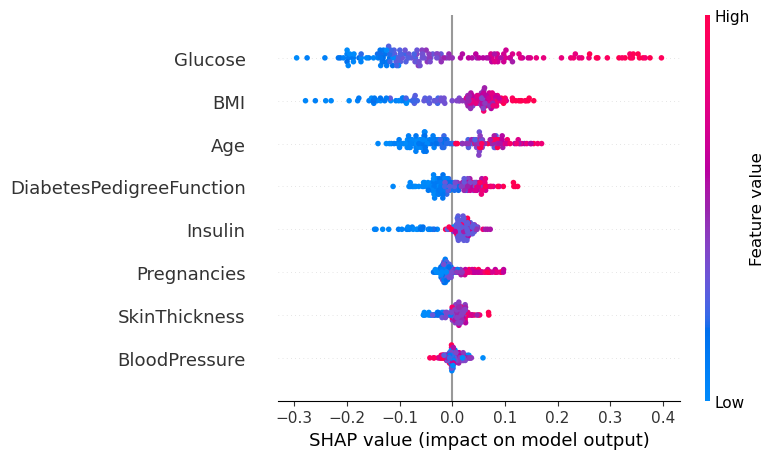

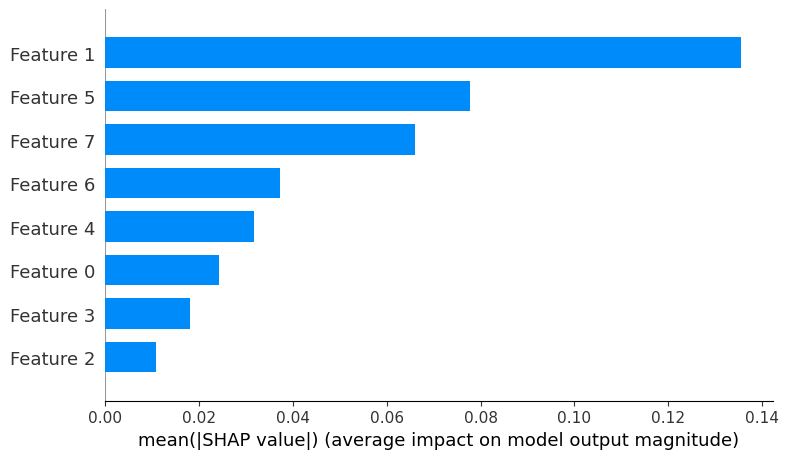

In [18]:
# Explaining the Random Forest Model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)


shap.force_plot(explainer.expected_value[1], shap_values[1][0], feature_names=X.columns)
shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

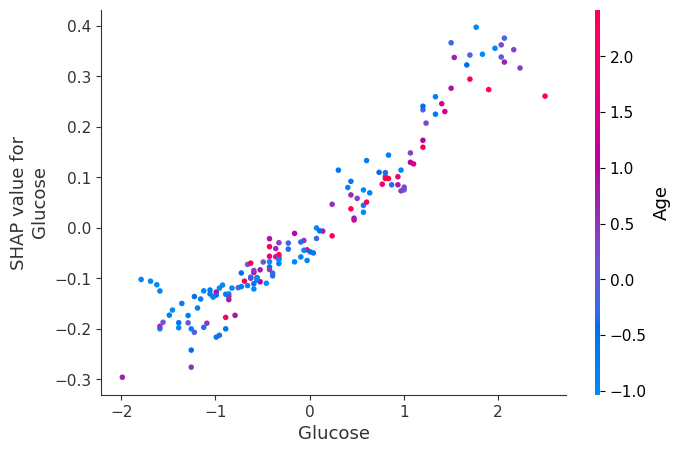

In [19]:
# Dependence Plot for Most Important Variable
most_important_feature = X.columns[np.argmax(np.mean(np.abs(shap_values[1]), axis=0))]
shap.dependence_plot(most_important_feature, shap_values[1], X_test, feature_names=X.columns)

###### Using SHAP values, Our understanding of the variables influencing diabetes risk was strengthened when we were able to clarify the model's predictions and identify its most significant characteristics.It shows how machine learning may be used in healthcare, especially in predicting the risk of diabetes, which can help medical professionals with early diagnosis and intervention plans. To improve predictive performance, future research could concentrate on improving the model even further and resolving class imbalances. Overall, this investigation emphasizes the significance of data-driven techniques in healthcare and offers insightful information about diabetes prediction.